<a href="https://colab.research.google.com/github/pedrohsmorais/Contador-de-garrafas/blob/main/Contador_de_garrafas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Sistema de Visão Computacional para Contagem Automática de Garrafas em Esteiras Industriais.

Pedro Henrique Soares Morais.

## Link do [Vídeo com as garrafas contadas](https://drive.google.com/file/d/10ZzewNepqevwE7AQUd_tJqQ83h0SjvBg/view?usp=sharing)



In [1]:
from google.colab import drive
import os

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = "/content/drive/MyDrive/contador"

%cd "$path"


/content/drive/MyDrive/contador


## Fazendo o dowload da biblioteca do modelo YOLO11X

In [3]:
!pip install ultralytics

!pip install --upgrade sympy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 914.9/914.9 kB 23.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 73.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

## Carregando as imagens rotulados com a ajuda do roboflow e verificando o tamanho de cada imagem.

In [ ]:
import os
from PIL import Image

image_dir = '/content/drive/MyDrive/contador/bottle-dataset-v3/train/images'

for img_name in os.listdir(image_dir):
    img_path = os.path.join(image_dir, img_name)
    with Image.open(img_path) as img:
        print(f"Imagem: {img_name}, Tamanho: {img.size}")

Imagem: Esteira-de-agua-2_mp4-0015_jpg.rf.c20a8cdd3adcbeae4a7f23eb62e2d577.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0014_jpg.rf.a264ba7cb472217ebac54c0122faaeb9.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0003_jpg.rf.8c66c08334eccfc87739a2a6542e3b6f.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0011_jpg.rf.bd6814ec72090bf179db212a968d6bc2.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0008_jpg.rf.c7e83bd2c3ee99c47f908024cee2e0fa.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0014_jpg.rf.de48b01aa7ac6670badb98f446726301.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0013_jpg.rf.4bb337a93ef4dd9779d75ddf3031ebe4.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0008_jpg.rf.620cb563b82e4ea7cf2e51fdd0fd1c88.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0001_jpg.rf.2593d43c5d0bbbc4465e72b67c07c718.jpg, Tamanho: (416, 416)
Imagem: Esteira-de-agua-2_mp4-0013_jpg.rf.951cc11ca55207eaa2c7b7174d7db994.jpg, Tamanho: (416, 416)


## Carregando o modelo YOLO11x e realizando o fine-tuning para identificar as garrafas específicas.


In [ ]:
from ultralytics import YOLO
import cv2

model = YOLO("yolo11x.pt")

model.train(data='/content/drive/MyDrive/contador/bottle-dataset-v3/data.yaml',
            epochs=50,
            batch=16,
            imgsz=416,
            )

Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolo11x.pt, data=/content/drive/MyDrive/contador/bottle-dataset-v3/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels

100%|██████████| 755k/755k [00:00<00:00, 18.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2784  ultralytics.nn.modules.conv.Conv             [3, 96, 3, 2]                 
  1                  -1  1    166272  ultralytics.nn.modules.conv.Conv             [96, 192, 3, 2]               
  2                  -1  2    389760  ultralytics.nn.modules.block.C3k2            [192, 384, 2, True, 0.25]     
  3                  -1  1   1327872  ultralytics.nn.modules.conv.Conv             [384, 384, 3, 2]              
  4                  -1  2   1553664  ultralytics.nn.modules.block.C3k2            [384, 768, 2, True, 0.25]     
  5                  -1  1   5309952  ultralytics.nn.modules.conv.Conv             [768, 768, 3, 2]              
  6                  -1  2   5022720  ultralytics.nn.modules.block.C3k2            [768, 768, 2, True]           
  7                  -1  1   5309952  ultralytics

train: Scanning /content/drive/MyDrive/contador/bottle-dataset-v3/train/labels... 102 images, 0 backgrounds, 0 corrupt: 100%|██████████| 102/102 [00:47<00:00,  2.15it/s]

train: New cache created: /content/drive/MyDrive/contador/bottle-dataset-v3/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.11/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 2.0.2 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/MyDrive/contador/bottle-dataset-v3/valid/labels... 9 images, 0 backgrounds, 0 corrupt: 100%|██████████| 9/9 [00:08<00:00,  1.12it/s]

val: New cache created: /content/drive/MyDrive/contador/bottle-dataset-v3/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 167 weight(decay=0.0), 174 weight(decay=0.0005), 173 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 416 train, 416 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/50      7.71G      3.794      2.858      2.934         90        416: 100%|██████████| 7/7 [00:06<00:00,  1.14it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.37s/it]

                   all          9        105      0.898      0.971      0.977       0.81



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/50      7.64G       1.47      1.082      1.292        117        416: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.96it/s]

                   all          9        105      0.944       0.97       0.99      0.671



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/50      7.69G      1.109     0.7058      1.145         67        416: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.06it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/50      7.68G      1.148     0.5883      1.137        114        416: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.66it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/50      7.85G      1.119     0.5755      1.172         58        416: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.23it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/50      7.69G      1.108     0.6029      1.119        123        416: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/50       7.9G      1.091     0.6487      1.129         85        416: 100%|██████████| 7/7 [00:04<00:00,  1.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.04it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/50      7.68G      1.055     0.5571      1.158         89        416: 100%|██████████| 7/7 [00:03<00:00,  1.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.20it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/50      7.89G      1.032     0.7572      1.105        140        416: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.89it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/50      7.68G      1.079     0.5702      1.104        124        416: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.95it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/50      7.84G      1.171     0.5853      1.155        109        416: 100%|██████████| 7/7 [00:03<00:00,  1.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.28it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/50      7.89G      1.214     0.6833      1.122        111        416: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.88it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/50      7.68G      1.062     0.5688      1.088        125        416: 100%|██████████| 7/7 [00:03<00:00,  2.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.22it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/50      7.88G      1.102     0.6178      1.161        108        416: 100%|██████████| 7/7 [00:04<00:00,  1.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/50      7.83G      1.034     0.5642      1.102         86        416: 100%|██████████| 7/7 [00:03<00:00,  1.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  8.26it/s]

                   all          9        105     0.0101     0.0762    0.00491    0.00184



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/50      7.85G      1.039     0.5598      1.109         69        416: 100%|██████████| 7/7 [00:03<00:00,  1.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.11it/s]

                   all          9        105    0.00381      0.019    0.00043   0.000227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/50       7.7G      1.035     0.5245      1.088        116        416: 100%|██████████| 7/7 [00:03<00:00,  1.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.99it/s]

                   all          9        105     0.0132     0.0476    0.00191   0.000678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/50      7.83G       1.08     0.5291       1.09        108        416: 100%|██████████| 7/7 [00:03<00:00,  1.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          9        105     0.0947      0.181     0.0221     0.0141



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/50      7.84G      1.126      0.571      1.114        121        416: 100%|██████████| 7/7 [00:03<00:00,  1.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.69it/s]

                   all          9        105     0.0351     0.0476    0.00584    0.00263



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/50      7.86G     0.9915     0.5239      1.076         63        416: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.13it/s]

                   all          9        105      0.623      0.476      0.481      0.357



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/50      7.69G     0.9349     0.4583      1.043         90        416: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.93it/s]

                   all          9        105      0.918      0.743      0.812      0.627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/50      7.89G     0.9281     0.4842      1.048        128        416: 100%|██████████| 7/7 [00:03<00:00,  1.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.42it/s]

                   all          9        105       0.97       0.81       0.87      0.651



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/50      7.85G     0.9341     0.4878      1.038         98        416: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.79it/s]

                   all          9        105      0.997          1      0.995      0.802



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/50      7.84G     0.8855     0.4691      1.065         64        416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          9        105      0.997          1      0.995      0.807



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/50       7.7G     0.9169      0.472      1.054         67        416: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.75it/s]

                   all          9        105      0.998          1      0.995      0.759



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/50       7.9G     0.8897     0.4528      1.026        113        416: 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.51it/s]

                   all          9        105      0.998          1      0.995      0.817



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/50      7.84G     0.8655     0.4338      1.006        105        416: 100%|██████████| 7/7 [00:03<00:00,  1.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.89it/s]

                   all          9        105      0.989          1      0.995       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/50      7.85G     0.8659     0.4478      1.003         71        416: 100%|██████████| 7/7 [00:03<00:00,  1.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.73it/s]

                   all          9        105      0.999          1      0.995      0.841



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/50      7.69G     0.9251     0.4629      1.038        104        416: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.18it/s]

                   all          9        105      0.999          1      0.995      0.814



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/50      7.86G      0.851     0.4519      1.032        121        416: 100%|██████████| 7/7 [00:04<00:00,  1.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.39it/s]

                   all          9        105      0.999          1      0.995      0.809



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      31/50      7.87G     0.8671      0.454      1.029        103        416: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.80it/s]

                   all          9        105          1          1      0.995      0.784



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      32/50       7.9G     0.8082     0.4344       1.01         88        416: 100%|██████████| 7/7 [00:03<00:00,  1.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.14it/s]

                   all          9        105      0.999          1      0.995      0.832



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      33/50      7.67G     0.8687     0.4495      1.021        130        416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.60it/s]

                   all          9        105      0.981      0.999      0.994      0.829



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      34/50      7.84G     0.8304     0.4355      1.021         62        416: 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.02it/s]

                   all          9        105      0.972       0.99      0.993      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      35/50      7.87G      0.816     0.4252      1.019        136        416: 100%|██████████| 7/7 [00:03<00:00,  1.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]

                   all          9        105      0.981      0.997      0.995      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      36/50      7.89G     0.7996     0.4042      1.005        121        416: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.25it/s]

                   all          9        105      0.999          1      0.995      0.861



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      37/50      7.68G     0.7733     0.4061      1.006        111        416: 100%|██████████| 7/7 [00:05<00:00,  1.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.72it/s]

                   all          9        105      0.999          1      0.995      0.849



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      38/50      7.84G     0.7636     0.3977      1.006        140        416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.58it/s]

                   all          9        105      0.999          1      0.995      0.862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      39/50      7.89G     0.7681      0.413      1.024         89        416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.99it/s]

                   all          9        105          1          1      0.995      0.848



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      40/50      7.84G     0.7324     0.3899     0.9905        112        416: 100%|██████████| 7/7 [00:04<00:00,  1.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.04it/s]

                   all          9        105      0.999          1      0.995      0.846


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      41/50      7.67G     0.6956     0.3601     0.9889         66        416: 100%|██████████| 7/7 [00:05<00:00,  1.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.84it/s]

                   all          9        105      0.999          1      0.995      0.831



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      42/50      7.86G       0.65     0.3454      1.003         61        416: 100%|██████████| 7/7 [00:03<00:00,  1.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.00it/s]

                   all          9        105      0.999          1      0.995      0.876



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      43/50      7.86G     0.6291     0.3305     0.9927         64        416: 100%|██████████| 7/7 [00:03<00:00,  1.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.05it/s]

                   all          9        105      0.999          1      0.995       0.88



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      44/50      7.87G     0.6338     0.3336     0.9747         64        416: 100%|██████████| 7/7 [00:04<00:00,  1.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  2.28it/s]

                   all          9        105      0.999          1      0.995      0.877



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      45/50      7.67G     0.6403     0.3316       0.96         61        416: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.29it/s]

                   all          9        105      0.999          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      46/50      7.86G       0.62     0.3267     0.9689         62        416: 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.30it/s]

                   all          9        105      0.999          1      0.995      0.886



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      47/50      7.87G     0.5962     0.3119     0.9701         64        416: 100%|██████████| 7/7 [00:03<00:00,  1.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  7.09it/s]

                   all          9        105      0.999          1      0.995       0.87



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      48/50      7.88G     0.6105     0.3163     0.9548         61        416: 100%|██████████| 7/7 [00:04<00:00,  1.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  4.87it/s]

                   all          9        105      0.999          1      0.995      0.874



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      49/50      7.67G     0.5833     0.3099     0.9524         70        416: 100%|██████████| 7/7 [00:03<00:00,  1.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  6.97it/s]

                   all          9        105      0.999          1      0.995      0.879



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      50/50      7.86G      0.573     0.2969     0.9452         65        416: 100%|██████████| 7/7 [00:04<00:00,  1.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  3.24it/s]

                   all          9        105      0.999          1      0.995      0.883



50 epochs completed in 0.112 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 114.4MB
Optimizer stripped from runs/detect/train/weights/best.pt, 114.4MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.69 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
YOLO11x summary (fused): 464 layers, 56,828,179 parameters, 0 gradients, 194.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  5.34it/s]


                   all          9        105      0.999          1      0.995      0.887
Speed: 0.1ms preprocess, 14.7ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x784c92919310>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

## Carrega histórico do treinamento, plota perdas e métricas para monitorar desempenho e progresso do modelo.

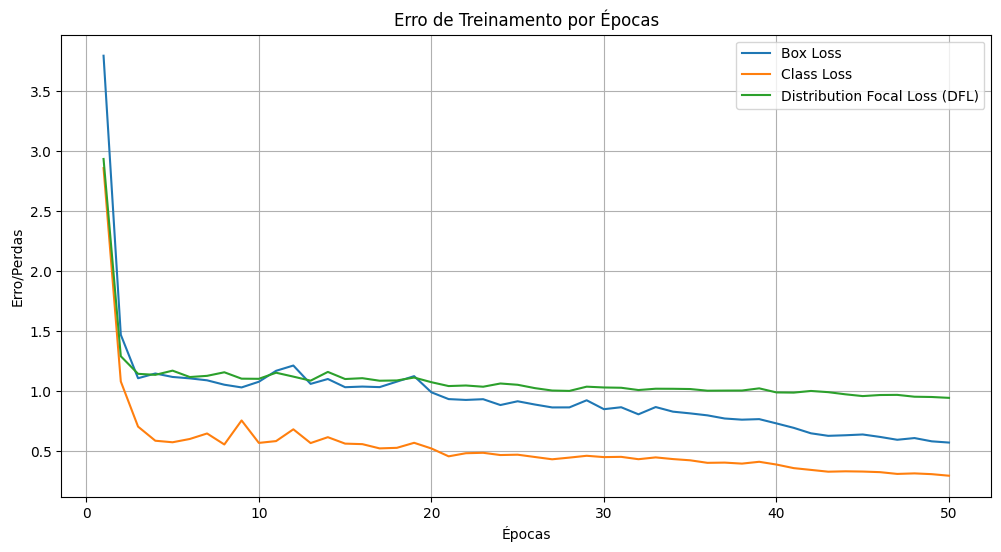

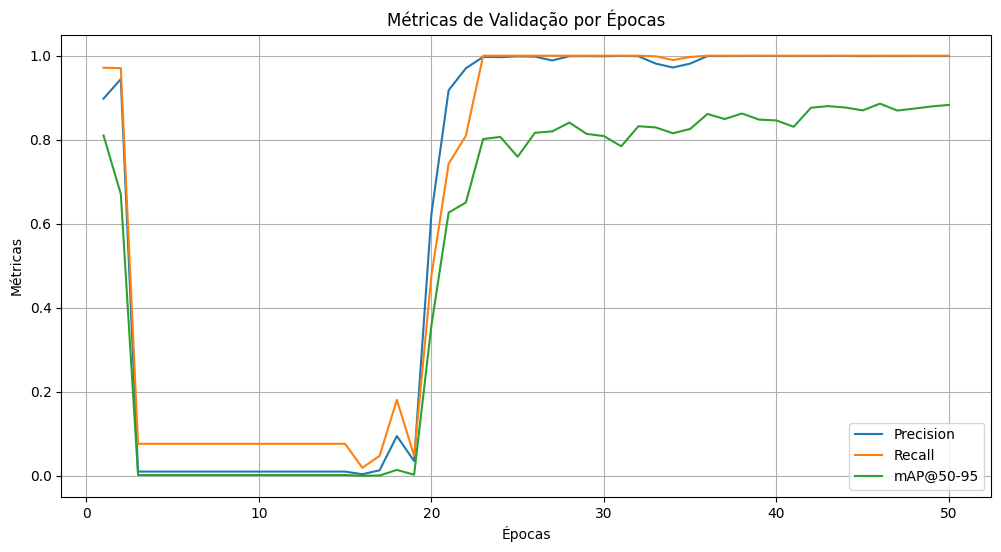

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

results_csv_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/runs/detect/train/results.csv"

history = pd.read_csv(results_csv_path)

# Gráfico de Loss (Perda)
plt.figure(figsize=(12, 6))
plt.plot(history['epoch'], history['train/box_loss'], label='Box Loss')
plt.plot(history['epoch'], history['train/cls_loss'], label='Class Loss')
plt.plot(history['epoch'], history['train/dfl_loss'], label='Distribution Focal Loss (DFL)')
plt.xlabel('Épocas')
plt.ylabel('Erro/Perdas')
plt.title('Erro de Treinamento por Épocas')
plt.legend()
plt.grid()
plt.show()

# Gráfico de Métricas de Validação (Precisão e mAP)
plt.figure(figsize=(12, 6))
plt.plot(history['epoch'], history['metrics/precision(B)'], label='Precision')
plt.plot(history['epoch'], history['metrics/recall(B)'], label='Recall')
plt.plot(history['epoch'], history['metrics/mAP50-95(B)'], label='mAP@50-95')
plt.xlabel('Épocas')
plt.ylabel('Métricas')
plt.title('Métricas de Validação por Épocas')
plt.legend()
plt.grid()
plt.show()


In [11]:
import pandas as pd

# Caminho para o CSV
results_csv_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/runs/detect/train/results.csv"

# Carregar o CSV
df = pd.read_csv(results_csv_path)

# Verificar as colunas disponíveis
print(df.columns)

# Procurar o melhor valor para cada métrica
best_precision = df['metrics/precision(B)'].max()  # Melhor Precision
best_recall = df['metrics/recall(B)'].max()  # Melhor Recall
best_map_50 = df['metrics/mAP50(B)'].max()  # Melhor mAP@50
best_map_50_95 = df['metrics/mAP50-95(B)'].max()  # Melhor mAP@50-95

# Imprimir os melhores valores
print(f"Melhor Precisão (Precision): {best_precision:.4f}")
print(f"Melhor Revocação (Recall): {best_recall:.4f}")
print(f"Melhor mAP@50: {best_map_50:.4f}")
print(f"Melhor mAP@50-95: {best_map_50_95:.4f}")


Index(['epoch', 'time', 'train/box_loss', 'train/cls_loss', 'train/dfl_loss',
       'metrics/precision(B)', 'metrics/recall(B)', 'metrics/mAP50(B)',
       'metrics/mAP50-95(B)', 'val/box_loss', 'val/cls_loss', 'val/dfl_loss',
       'lr/pg0', 'lr/pg1', 'lr/pg2'],
      dtype='object')
Melhor Precisão (Precision): 0.9996
Melhor Revocação (Recall): 1.0000
Melhor mAP@50: 0.9950
Melhor mAP@50-95: 0.8859


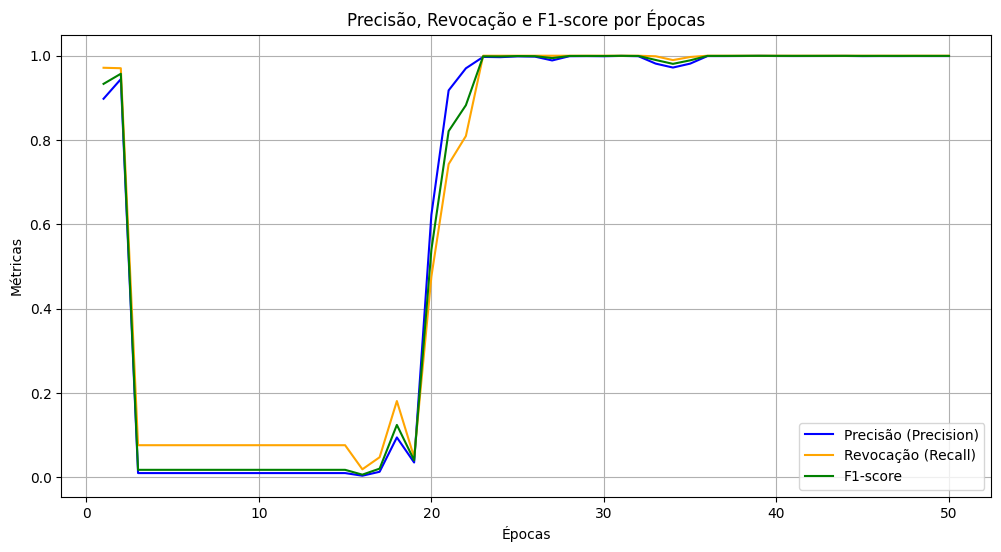

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Caminho do CSV contendo os resultados do treinamento
results_csv_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/runs/detect/train/results.csv"

# Carregar os dados do histórico de treinamento
history = pd.read_csv(results_csv_path)

# Calcular o F1-score
history['F1-score'] = 2 * (history['metrics/precision(B)'] * history['metrics/recall(B)']) / \
                      (history['metrics/precision(B)'] + history['metrics/recall(B)'])

# Gráfico das métricas Precision, Recall e F1-score
plt.figure(figsize=(12, 6))
plt.plot(history['epoch'], history['metrics/precision(B)'], label='Precisão (Precision)', color='blue')
plt.plot(history['epoch'], history['metrics/recall(B)'], label='Revocação (Recall)', color='orange')
plt.plot(history['epoch'], history['F1-score'], label='F1-score', color='green')
plt.xlabel('Épocas')
plt.ylabel('Métricas')
plt.title('Precisão, Revocação e F1-score por Épocas')
plt.legend()
plt.grid()
plt.show()


# Falta explicar essa célula



0: 416x416 12 garrafas, 1676.5ms
Speed: 4.8ms preprocess, 1676.5ms inference, 1.1ms postprocess per image at shape (1, 3, 416, 416)
Número de objetos real: 12
Número de objetos detectados: 12
Média de IoU: 0.93


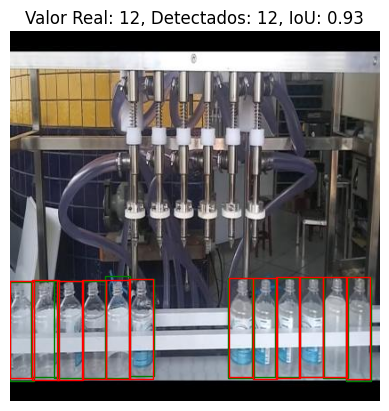

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO

image_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/test/images/Esteira-de-agua-2_mp4-0059_jpg.rf.c3383fbbe384856183bb93611f223992.jpg"
label_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/test/labels/Esteira-de-agua-2_mp4-0059_jpg.rf.c3383fbbe384856183bb93611f223992.txt"
model_path = "/content/drive/MyDrive/contador/bottle-dataset-v3/runs/detect/train/weights/best.pt"

img = cv2.imread(image_path)

h, w, _ = img.shape
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

def load_ground_truth_boxes(label_path, width, height):
    boxes = []
    try:
        with open(label_path, 'r') as f:
            for line in f:
                class_id, center_x, center_y, box_width, box_height = map(float, line.strip().split())
                x1 = int((center_x - box_width / 2) * width)
                y1 = int((center_y - box_height / 2) * height)
                x2 = int((center_x + box_width / 2) * width)
                y2 = int((center_y + box_height / 2) * height)
                boxes.append([x1, y1, x2, y2])
        return boxes
    except FileNotFoundError:
        print(f"Error:{label_path}")
        return []

ground_truth_boxes = load_ground_truth_boxes(label_path, w, h)
num_ground_truth = len(ground_truth_boxes)

model = YOLO(model_path)

results = model.predict(img)

detections = []
for result in results:
    boxes = result.boxes
    for box in boxes:
        xyxy = box.xyxy[0].tolist()
        x1, y1, x2, y2 = map(int, xyxy)
        detections.append([x1, y1, x2, y2])

num_detections = len(detections)

print(f"Número de objetos real: {num_ground_truth}")
print(f"Número de objetos detectados: {num_detections}")

def calculate_iou(box1, box2):
    x1_intersect = max(box1[0], box2[0])
    y1_intersect = max(box1[1], box2[1])
    x2_intersect = min(box1[2], box2[2])
    y2_intersect = min(box1[3], box2[3])

    intersection_area = max(0, x2_intersect - x1_intersect) * max(0, y2_intersect - y1_intersect)

    box1_area = (box1[2] - box1[0]) * (box1[3] - box1[1])
    box2_area = (box2[2] - box2[0]) * (box2[3] - box2[1])

    union_area = box1_area + box2_area - intersection_area

    iou = intersection_area / union_area if union_area > 0 else 0.0
    return iou

ious = []
matched_ground_truth = [False] * len(ground_truth_boxes)
for detection in detections:
    best_iou = 0
    best_match_idx = -1
    for i, gt_box in enumerate(ground_truth_boxes):
        if not matched_ground_truth[i]:
            iou = calculate_iou(detection, gt_box)
            if iou > best_iou:
                best_iou = iou
                best_match_idx = i
    if best_match_idx != -1:
        ious.append(best_iou)
        matched_ground_truth[best_match_idx] = True

average_iou = np.mean(ious) if ious else 0.0
print(f"Média de IoU: {average_iou:.2f}")

visualize_results = True

if visualize_results:
    fig, ax = plt.subplots(1)
    ax.imshow(img_rgb)
    ax.axis('off')

    for box in ground_truth_boxes:
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)

    for box in detections:
        rect = plt.Rectangle((box[0], box[1]), box[2] - box[0], box[3] - box[1],
                             linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)

    ax.set_title(f"Valor Real: {num_ground_truth}, Detectados: {num_detections}, IoU: {average_iou:.2f}")
    plt.show()


In [ ]:
import cv2
from ultralytics import solutions

video_path = "/content/drive/MyDrive/contador/Esteira de água-2.mp4"

cap = cv2.VideoCapture(video_path)
assert cap.isOpened(), "Erro ao carregar o vídeo."
w, h, fps = (int(cap.get(x)) for x in (cv2.CAP_PROP_FRAME_WIDTH, cv2.CAP_PROP_FRAME_HEIGHT, cv2.CAP_PROP_FPS))

# Define pontos da região para contagem
region_points = [(1000, 0), (1000, h)]  # Linha vertical para contagem

output_video_path = "video-contado.mp4"
video_writer = cv2.VideoWriter(output_video_path, cv2.VideoWriter_fourcc(*"mp4v"), fps, (w, h))

counter = solutions.ObjectCounter(
    show=True,  # Exibir a saída
    region=region_points, # Linha vertical para contagem
    model="/content/drive/MyDrive/contador/bottle-dataset-v3/runs/detect/train/weights/best.pt",
    classes=[0],  # ID da classe "garrafa"
    show_in=True,
    show_out=False,
    line_width=2,
)

while cap.isOpened():
    success, im0 = cap.read()
    if not success:
        print("Fim do vídeo ou falha ao processar quadro.")
        break

    im0 = counter.count(im0)

    video_writer.write(im0)

cap.release()
video_writer.release()
cv2.destroyAllWindows()

print(f"Vídeo com contagem de objetos salvo em: {output_video_path}")


A saída de streaming foi truncada nas últimas 5000 linhas.

0: 256x416 14 garrafas, 26.7ms
Speed: 1.6ms preprocess, 26.7ms inference, 2.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 14 garrafas, 26.8ms
Speed: 2.0ms preprocess, 26.8ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 14 garrafas, 27.4ms
Speed: 1.7ms preprocess, 27.4ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 15 garrafas, 27.1ms
Speed: 2.4ms preprocess, 27.1ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 15 garrafas, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.5ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 14 garrafas, 27.0ms
Speed: 1.7ms preprocess, 27.0ms inference, 1.9ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 14 garrafas, 26.7ms
Speed: 1.7ms preprocess, 26.7ms inference, 1.6ms postprocess per image at shape (1, 3, 256, 416)

0: 256x416 14 garrafas, 26.8ms
Speed: